<a href="https://colab.research.google.com/github/Carlscamt/CRM-Sales-Opportunities/blob/main/CRM_Sales_Opportunities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar los datos
sales_pipeline = pd.read_csv('sales_pipeline.csv')
accounts = pd.read_csv('accounts.csv')
sales_teams = pd.read_csv('sales_teams.csv')
products = pd.read_csv('products.csv')

# Limpiar nombres de columnas del pipeline
sales_pipeline.columns = ['opportunity_id', 'sales_agent', 'product', 'account',
                          'deal_stage', 'engage_date', 'close_date', 'close_value']

# Convertir fechas
sales_pipeline['engage_date'] = pd.to_datetime(sales_pipeline['engage_date'])
sales_pipeline['close_date'] = pd.to_datetime(sales_pipeline['close_date'])

# Exploración básica
print("="*60)
print("RESUMEN DEL DATASET")
print("="*60)
print(f"\nTotal de oportunidades: {len(sales_pipeline):,}")
print(f"Total de cuentas: {len(accounts)}")
print(f"Total de agentes: {len(sales_teams)}")
print(f"Total de productos: {len(products)}")

# Análisis de pipeline
print("\n" + "="*60)
print("ANÁLISIS DEL PIPELINE DE VENTAS")
print("="*60)

# Distribución por etapa
stage_counts = sales_pipeline['deal_stage'].value_counts()
print("\nOportunidades por etapa:")
print(stage_counts)
print(f"\nTasa de conversión: {stage_counts.get('Won', 0) / len(sales_pipeline) * 100:.2f}%")

# Métricas financieras
won_deals = sales_pipeline[sales_pipeline['deal_stage'] == 'Won']
print(f"\nValor total ganado: ${won_deals['close_value'].sum():,.2f}")
print(f"Valor promedio por deal ganado: ${won_deals['close_value'].mean():,.2f}")
print(f"Deal más grande: ${won_deals['close_value'].max():,.2f}")

# Top agentes
print("\n" + "="*60)
print("TOP 10 AGENTES DE VENTAS")
print("="*60)

agent_performance = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].groupby('sales_agent').agg({
    'close_value': ['sum', 'count', 'mean']
}).round(2)
agent_performance.columns = ['Total_Revenue', 'Deals_Won', 'Avg_Deal_Size']
agent_performance = agent_performance.sort_values('Total_Revenue', ascending=False)
print(agent_performance.head(10))

# Análisis de productos
print("\n" + "="*60)
print("ANÁLISIS DE PRODUCTOS")
print("="*60)

product_performance = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].groupby('product').agg({
    'close_value': ['sum', 'count']
}).round(2)
product_performance.columns = ['Total_Revenue', 'Units_Sold']
product_performance = product_performance.sort_values('Total_Revenue', ascending=False)
print(product_performance)

# Merge con información de productos
product_performance = product_performance.merge(products, on='product', how='left')
print("\nRentabilidad por producto:")
print(product_performance)

# Análisis por sector
print("\n" + "="*60)
print("ANÁLISIS POR SECTOR")
print("="*60)

# Merge pipeline con accounts
pipeline_accounts = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].merge(
    accounts[['account', 'sector', 'revenue', 'employees']],
    on='account',
    how='left'
)

sector_analysis = pipeline_accounts.groupby('sector').agg({
    'close_value': ['sum', 'count', 'mean']
}).round(2)
sector_analysis.columns = ['Total_Revenue', 'Deals', 'Avg_Deal_Size']
sector_analysis = sector_analysis.sort_values('Total_Revenue', ascending=False)
print(sector_analysis)

# Análisis temporal
print("\n" + "="*60)
print("ANÁLISIS TEMPORAL")
print("="*60)

# Agregar columnas de tiempo
sales_pipeline['close_month'] = sales_pipeline['close_date'].dt.to_period('M')
sales_pipeline['days_to_close'] = (sales_pipeline['close_date'] - sales_pipeline['engage_date']).dt.days

monthly_revenue = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].groupby('close_month')['close_value'].sum()
print("\nRevenue mensual:")
print(monthly_revenue)

print(f"\nTiempo promedio de cierre: {sales_pipeline['days_to_close'].mean():.1f} días")

# Análisis por oficina regional
print("\n" + "="*60)
print("ANÁLISIS POR OFICINA REGIONAL")
print("="*60)

pipeline_teams = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].merge(
    sales_teams, on='sales_agent', how='left'
)

regional_performance = pipeline_teams.groupby('regional_office').agg({
    'close_value': ['sum', 'count', 'mean']
}).round(2)
regional_performance.columns = ['Total_Revenue', 'Deals', 'Avg_Deal_Size']
print(regional_performance)

# Exportar resultados clave
print("\n" + "="*60)
print("EXPORTANDO RESULTADOS")
print("="*60)

# Guardar análisis en CSV
agent_performance.to_csv('agent_performance.csv')
product_performance.to_csv('product_performance.csv')
sector_analysis.to_csv('sector_analysis.csv')
regional_performance.to_csv('regional_performance.csv')

print("\nArchivos exportados:")
print("- agent_performance.csv")
print("- product_performance.csv")
print("- sector_analysis.csv")
print("- regional_performance.csv")


RESUMEN DEL DATASET

Total de oportunidades: 8,800
Total de cuentas: 85
Total de agentes: 35
Total de productos: 7

ANÁLISIS DEL PIPELINE DE VENTAS

Oportunidades por etapa:
deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

Tasa de conversión: 48.16%

Valor total ganado: $10,005,534.00
Valor promedio por deal ganado: $2,360.91
Deal más grande: $30,288.00

TOP 10 AGENTES DE VENTAS
                 Total_Revenue  Deals_Won  Avg_Deal_Size
sales_agent                                             
Darcel Schlecht      1153214.0        349        3304.34
Vicki Laflamme        478396.0        221        2164.69
Kary Hendrixson       454298.0        209        2173.67
Cassey Cress          450489.0        163        2763.74
Donn Cantrell         445860.0        158        2821.90
Reed Clapper          438336.0        155        2827.97
Zane Levy             430068.0        161        2671.23
Corliss Cosme         421036.0      

In [3]:
# ============================================================
# ANÁLISIS AVANZADO DE CRM
# ============================================================

# 1. ANÁLISIS DE TASA DE CONVERSIÓN POR AGENTE
print("\n" + "="*60)
print("ANÁLISIS DE TASA DE CONVERSIÓN POR AGENTE")
print("="*60)

agent_conversion = sales_pipeline.groupby('sales_agent').agg({
    'opportunity_id': 'count',
    'deal_stage': lambda x: (x == 'Won').sum()
}).rename(columns={'opportunity_id': 'total_opps', 'deal_stage': 'won_deals'})

agent_conversion['conversion_rate'] = (agent_conversion['won_deals'] / agent_conversion['total_opps'] * 100).round(2)
agent_conversion['lost_deals'] = sales_pipeline[sales_pipeline['deal_stage'] == 'Lost'].groupby('sales_agent').size()
agent_conversion = agent_conversion.fillna(0)

# Merge con revenue
agent_conversion = agent_conversion.merge(
    agent_performance[['Total_Revenue']],
    left_index=True,
    right_index=True,
    how='left'
).fillna(0)

agent_conversion = agent_conversion.sort_values('conversion_rate', ascending=False)
print("\nTop 10 agentes por tasa de conversión:")
print(agent_conversion.head(10))

print(f"\nPromedio de conversión general: {agent_conversion['conversion_rate'].mean():.2f}%")

# 2. ANÁLISIS DE EFICIENCIA: REVENUE POR OPORTUNIDAD
print("\n" + "="*60)
print("EFICIENCIA: REVENUE POR OPORTUNIDAD TOTAL")
print("="*60)

agent_conversion['revenue_per_opp'] = (agent_conversion['Total_Revenue'] / agent_conversion['total_opps']).round(2)
agent_efficiency = agent_conversion.sort_values('revenue_per_opp', ascending=False)
print("\nTop 10 agentes más eficientes ($/oportunidad):")
print(agent_efficiency[['total_opps', 'won_deals', 'conversion_rate', 'revenue_per_opp']].head(10))

# 3. ANÁLISIS DE CICLO DE VENTAS
print("\n" + "="*60)
print("ANÁLISIS DE CICLO DE VENTAS")
print("="*60)

won_pipeline = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].copy()
won_pipeline['days_to_close'] = (won_pipeline['close_date'] - won_pipeline['engage_date']).dt.days

# Por producto
cycle_by_product = won_pipeline.groupby('product').agg({
    'days_to_close': ['mean', 'median', 'min', 'max'],
    'close_value': 'mean'
}).round(2)
cycle_by_product.columns = ['Avg_Days', 'Median_Days', 'Min_Days', 'Max_Days', 'Avg_Value']
print("\nCiclo de ventas por producto:")
print(cycle_by_product.sort_values('Avg_Days'))

# 4. ANÁLISIS DE PRODUCTOS POR SERIE
print("\n" + "="*60)
print("ANÁLISIS DE RENDIMIENTO POR SERIE DE PRODUCTOS")
print("="*60)

# Agregar serie al pipeline
pipeline_products = won_pipeline.merge(products, on='product', how='left')

series_analysis = pipeline_products.groupby('series').agg({
    'close_value': ['sum', 'count', 'mean'],
    'sales_price': 'mean',
    'days_to_close': 'mean'
}).round(2)
series_analysis.columns = ['Total_Revenue', 'Units_Sold', 'Avg_Deal_Size', 'Avg_Price', 'Avg_Days']
print(series_analysis)

# 5. ANÁLISIS DE CUENTAS: TAMAÑO vs VENTAS
print("\n" + "="*60)
print("ANÁLISIS: TAMAÑO DE CUENTA vs PERFORMANCE")
print("="*60)

account_sales = won_pipeline.groupby('account').agg({
    'close_value': ['sum', 'count'],
    'days_to_close': 'mean'
}).round(2)
account_sales.columns = ['Total_Revenue', 'Num_Deals', 'Avg_Days']

# Merge con datos de cuentas
account_analysis = account_sales.merge(
    accounts[['account', 'sector', 'revenue', 'employees', 'subsidiary_of']],
    on='account',
    how='left'
)

# Categorizar por tamaño de empresa
account_analysis['company_size'] = pd.cut(
    account_analysis['employees'],
    bins=[0, 500, 2000, 5000, 50000],
    labels=['Small', 'Medium', 'Large', 'Enterprise']
)

size_performance = account_analysis.groupby('company_size').agg({
    'Total_Revenue': ['sum', 'mean'],
    'Num_Deals': 'sum',
    'Avg_Days': 'mean'
}).round(2)
size_performance.columns = ['Total_Revenue', 'Avg_Revenue_Per_Account', 'Total_Deals', 'Avg_Days']
print("\nPerformance por tamaño de empresa:")
print(size_performance)

# Top 10 cuentas
print("\nTop 10 cuentas por revenue:")
print(account_analysis.nlargest(10, 'Total_Revenue')[['account', 'sector', 'Total_Revenue', 'Num_Deals', 'employees']])

# 6. ANÁLISIS DE SUBSIDIARIAS
print("\n" + "="*60)
print("ANÁLISIS: SUBSIDIARIAS vs EMPRESAS INDEPENDIENTES")
print("="*60)

account_analysis['is_subsidiary'] = account_analysis['subsidiary_of'].notna()
subsidiary_analysis = account_analysis.groupby('is_subsidiary').agg({
    'Total_Revenue': ['sum', 'mean', 'count'],
    'Num_Deals': 'mean',
    'Avg_Days': 'mean'
}).round(2)
subsidiary_analysis.columns = ['Total_Revenue', 'Avg_Per_Account', 'Count', 'Avg_Deals', 'Avg_Days']
subsidiary_analysis.index = ['Independent', 'Subsidiary']
print(subsidiary_analysis)

# 7. ANÁLISIS DE TENDENCIAS MENSUALES
print("\n" + "="*60)
print("ANÁLISIS DE TENDENCIAS Y ESTACIONALIDAD")
print("="*60)

monthly_analysis = won_pipeline.groupby('close_month').agg({
    'close_value': ['sum', 'count', 'mean'],
    'days_to_close': 'mean'
}).round(2)
monthly_analysis.columns = ['Revenue', 'Deals_Closed', 'Avg_Deal_Size', 'Avg_Days']
print("\nTendencias mensuales:")
print(monthly_analysis)

# Calcular crecimiento mes a mes
monthly_analysis['Revenue_Growth_%'] = monthly_analysis['Revenue'].pct_change() * 100
print("\nCrecimiento mensual:")
print(monthly_analysis[['Revenue', 'Revenue_Growth_%']])

# 8. ANÁLISIS DE MANAGER PERFORMANCE
print("\n" + "="*60)
print("ANÁLISIS DE PERFORMANCE POR MANAGER")
print("="*60)

pipeline_full = won_pipeline.merge(sales_teams, on='sales_agent', how='left')

manager_performance = pipeline_full.groupby('manager').agg({
    'close_value': ['sum', 'mean', 'count'],
    'sales_agent': 'nunique',
    'days_to_close': 'mean'
}).round(2)
manager_performance.columns = ['Total_Revenue', 'Avg_Deal_Size', 'Total_Deals', 'Num_Agents', 'Avg_Days']
manager_performance['Revenue_Per_Agent'] = (manager_performance['Total_Revenue'] / manager_performance['Num_Agents']).round(2)
manager_performance = manager_performance.sort_values('Total_Revenue', ascending=False)
print(manager_performance)

# 9. ANÁLISIS DE WIN/LOSS POR PRODUCTO
print("\n" + "="*60)
print("WIN/LOSS RATIO POR PRODUCTO")
print("="*60)

product_winloss = sales_pipeline[sales_pipeline['deal_stage'].isin(['Won', 'Lost'])].groupby(['product', 'deal_stage']).size().unstack(fill_value=0)
product_winloss['Win_Rate_%'] = (product_winloss['Won'] / (product_winloss['Won'] + product_winloss['Lost']) * 100).round(2)
product_winloss = product_winloss.sort_values('Win_Rate_%', ascending=False)
print(product_winloss)

# 10. RESUMEN EJECUTIVO
print("\n" + "="*60)
print("RESUMEN EJECUTIVO - KPIs CLAVE")
print("="*60)

total_revenue = won_pipeline['close_value'].sum()
total_opportunities = len(sales_pipeline)
won_deals = len(won_pipeline)
lost_deals = len(sales_pipeline[sales_pipeline['deal_stage'] == 'Lost'])
engaging = len(sales_pipeline[sales_pipeline['deal_stage'] == 'Engaging'])

print(f"""
MÉTRICAS GENERALES:
- Revenue Total: ${total_revenue:,.2f}
- Tasa de Conversión Global: {(won_deals/total_opportunities)*100:.2f}%
- Avg Deal Size: ${total_revenue/won_deals:,.2f}
- Avg Sales Cycle: {won_pipeline['days_to_close'].mean():.1f} días

PIPELINE ACTUAL:
- En proceso (Engaging): {engaging} oportunidades
- Valor potencial: ${sales_pipeline[sales_pipeline['deal_stage']=='Engaging']['close_value'].sum():,.2f}

TOP PERFORMERS:
- Mejor Agente: {agent_performance.index[0]} (${agent_performance.iloc[0]['Total_Revenue']:,.2f})
- Mejor Producto: GTXPro (${3510578:,.2f})
- Mejor Sector: retail (${1867528:,.2f})
- Mejor Región: West (${3568647:,.2f})

OPORTUNIDADES DE MEJORA:
- Agentes con conversión <40%: {len(agent_conversion[agent_conversion['conversion_rate'] < 40])}
- Ciclo de ventas más largo: {cycle_by_product['Avg_Days'].idxmax()} ({cycle_by_product['Avg_Days'].max():.1f} días)
""")

# Guardar análisis adicionales
agent_conversion.to_csv('agent_conversion_analysis.csv')
account_analysis.to_csv('account_detailed_analysis.csv')
manager_performance.to_csv('manager_performance.csv')

print("\nArchivos adicionales exportados:")
print("- agent_conversion_analysis.csv")
print("- account_detailed_analysis.csv")
print("- manager_performance.csv")



ANÁLISIS DE TASA DE CONVERSIÓN POR AGENTE

Top 10 agentes por tasa de conversión:
                    total_opps  won_deals  conversion_rate  lost_deals  \
sales_agent                                                              
Reed Clapper               237        155            65.40          82   
Garret Kinder              123         75            60.98          48   
Donn Cantrell              275        158            57.45         117   
Hayden Neloms              202        107            52.97          45   
Cecily Lampkin             203        107            52.71          53   
Maureen Marcano            285        149            52.28          64   
James Ascencio             267        135            50.56          71   
Wilburn Farren             110         55            50.00          24   
Moses Frase                260        129            49.62          66   
Jonathan Berthelot         345        171            49.57          93   

                    Total_Re

/tmp/ipython-input-1276705506.py:101: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_performance = account_analysis.groupby('company_size').agg({


In [5]:
# ============================================================
# ANÁLISIS PREDICTIVO Y SEGMENTACIÓN AVANZADA (CORREGIDO)
# ============================================================

import warnings
warnings.filterwarnings('ignore')

# Ya tenemos la segmentación RFM y análisis de cross-sell
# Vamos a corregir el análisis de probabilidad de cierre

print("\n" + "="*60)
print("PROBABILIDAD DE CIERRE POR CARACTERÍSTICAS")
print("="*60)

# Preparar dataset completo
all_deals = sales_pipeline[sales_pipeline['deal_stage'].isin(['Won', 'Lost'])].copy()
all_deals['won'] = (all_deals['deal_stage'] == 'Won').astype(int)

# Agregar características paso a paso
all_deals_enhanced = all_deals.merge(sales_teams, on='sales_agent', how='left')
all_deals_enhanced = all_deals_enhanced.merge(
    accounts[['account', 'sector', 'revenue', 'employees']],
    on='account',
    how='left'
)

# Corregir merge con productos
products_df = pd.DataFrame({
    'product': ['GTX Basic', 'GTX Pro', 'MG Special', 'MG Advanced', 'GTX Plus Pro', 'GTX Plus Basic', 'GTK 500'],
    'series': ['GTX', 'GTX', 'MG', 'MG', 'GTX', 'GTX', 'GTK'],
    'sales_price': [550, 4821, 55, 3393, 5482, 1096, 26768]
})

all_deals_enhanced = all_deals_enhanced.merge(products_df, on='product', how='left')

# Análisis por características
print("\nProbabilidad de cierre por región:")
region_prob = all_deals_enhanced.groupby('regional_office')['won'].agg(['sum', 'count', 'mean']).round(4)
region_prob.columns = ['Won', 'Total', 'Win_Rate']
region_prob['Win_Rate'] = (region_prob['Win_Rate'] * 100).round(2)
print(region_prob)

print("\nProbabilidad de cierre por serie de producto:")
series_prob = all_deals_enhanced.groupby('series')['won'].agg(['sum', 'count', 'mean']).round(4)
series_prob.columns = ['Won', 'Total', 'Win_Rate']
series_prob['Win_Rate'] = (series_prob['Win_Rate'] * 100).round(2)
print(series_prob)

print("\nProbabilidad de cierre por sector:")
sector_prob = all_deals_enhanced.groupby('sector')['won'].agg(['sum', 'count', 'mean']).round(4)
sector_prob.columns = ['Won', 'Total', 'Win_Rate']
sector_prob['Win_Rate'] = (sector_prob['Win_Rate'] * 100).round(2)
print(sector_prob.sort_values('Win_Rate', ascending=False))

print("\nProbabilidad de cierre por manager:")
manager_prob = all_deals_enhanced.groupby('manager')['won'].agg(['sum', 'count', 'mean']).round(4)
manager_prob.columns = ['Won', 'Total', 'Win_Rate']
manager_prob['Win_Rate'] = (manager_prob['Win_Rate'] * 100).round(2)
print(manager_prob.sort_values('Win_Rate', ascending=False))

# 6. ANÁLISIS DE VELOCIDAD DEL PIPELINE
print("\n" + "="*60)
print("VELOCIDAD DEL PIPELINE (Pipeline Velocity)")
print("="*60)

current_engaging = sales_pipeline[sales_pipeline['deal_stage'] == 'Engaging'].copy()

if len(current_engaging) > 0:
    num_opportunities = len(current_engaging)
    overall_win_rate = len(won_pipeline) / len(all_deals)
    avg_deal_value = won_pipeline['close_value'].mean()
    avg_sales_cycle = won_pipeline['days_to_close'].mean()

    pipeline_velocity = (num_opportunities * overall_win_rate * avg_deal_value) / avg_sales_cycle

    print(f"\nMétricas actuales del pipeline:")
    print(f"- Oportunidades en pipeline (Engaging): {num_opportunities}")
    print(f"- Win Rate histórico: {overall_win_rate*100:.2f}%")
    print(f"- Avg Deal Value: ${avg_deal_value:,.2f}")
    print(f"- Avg Sales Cycle: {avg_sales_cycle:.1f} días")
    print(f"\nPipeline Velocity: ${pipeline_velocity:,.2f} por día")
    print(f"Revenue proyectado próximos 30 días: ${pipeline_velocity * 30:,.2f}")
    print(f"Revenue proyectado próximos 90 días: ${pipeline_velocity * 90:,.2f}")

# Velocity por agente con oportunidades actuales
agent_velocity = []
for agent in current_engaging['sales_agent'].unique():
    agent_opps = len(current_engaging[current_engaging['sales_agent'] == agent])
    agent_hist = all_deals_enhanced[all_deals_enhanced['sales_agent'] == agent]

    if len(agent_hist) > 0:
        agent_win_rate = agent_hist['won'].mean()
        agent_won = won_pipeline[won_pipeline['sales_agent'] == agent]

        if len(agent_won) > 0:
            agent_avg_deal = agent_won['close_value'].mean()
            agent_cycle = agent_won['days_to_close'].mean()

            if pd.notna(agent_cycle) and agent_cycle > 0:
                velocity = (agent_opps * agent_win_rate * agent_avg_deal) / agent_cycle
                projected_30d = velocity * 30

                agent_velocity.append({
                    'agent': agent,
                    'opportunities': agent_opps,
                    'win_rate': f"{agent_win_rate*100:.1f}%",
                    'velocity_per_day': round(velocity, 2),
                    'projected_30d': round(projected_30d, 2)
                })

velocity_df = pd.DataFrame(agent_velocity).sort_values('velocity_per_day', ascending=False)
print("\nTop 15 agentes por Pipeline Velocity (con oportunidades activas):")
print(velocity_df.head(15))

# 7. ANÁLISIS DE WIN/LOSS POR COMBINACIÓN DE FACTORES
print("\n" + "="*60)
print("ANÁLISIS WIN/LOSS POR COMBINACIÓN DE FACTORES")
print("="*60)

# Win rate por región + serie de producto
win_by_region_series = all_deals_enhanced.groupby(['regional_office', 'series'])['won'].agg(['sum', 'count', 'mean'])
win_by_region_series['win_rate'] = (win_by_region_series['mean'] * 100).round(2)
win_by_region_series = win_by_region_series[win_by_region_series['count'] >= 20]  # Mínimo 20 deals
print("\nWin Rate por Región + Serie de Producto:")
print(win_by_region_series[['sum', 'count', 'win_rate']].sort_values('win_rate', ascending=False))

# Win rate por manager + producto
win_by_manager_product = all_deals_enhanced.groupby(['manager', 'series'])['won'].agg(['sum', 'count', 'mean'])
win_by_manager_product['win_rate'] = (win_by_manager_product['mean'] * 100).round(2)
win_by_manager_product = win_by_manager_product[win_by_manager_product['count'] >= 20]
print("\nWin Rate por Manager + Serie de Producto:")
print(win_by_manager_product[['sum', 'count', 'win_rate']].sort_values('win_rate', ascending=False))

# 8. ANÁLISIS DE TAMAÑO DE DEAL vs WIN RATE
print("\n" + "="*60)
print("ANÁLISIS: TAMAÑO DE DEAL vs WIN RATE")
print("="*60)

# Categorizar por precio del producto
all_deals_enhanced['price_category'] = pd.cut(
    all_deals_enhanced['sales_price'],
    bins=[0, 1000, 5000, 30000],
    labels=['Low (<$1K)', 'Medium ($1K-$5K)', 'High (>$5K)']
)

price_win_rate = all_deals_enhanced.groupby('price_category')['won'].agg(['sum', 'count', 'mean'])
price_win_rate['win_rate'] = (price_win_rate['mean'] * 100).round(2)
price_win_rate.columns = ['Won', 'Total', 'Win_Rate_Decimal', 'Win_Rate_%']
print("\nWin Rate por categoría de precio:")
print(price_win_rate[['Won', 'Total', 'Win_Rate_%']])

# 9. MÉTRICAS DE SALUD DEL PIPELINE
print("\n" + "="*60)
print("MÉTRICAS DE SALUD DEL PIPELINE")
print("="*60)

# Estado actual del pipeline
pipeline_health = sales_pipeline.groupby('deal_stage').agg({
    'opportunity_id': 'count',
    'close_value': lambda x: x.sum() if x.notna().any() else 0
})
pipeline_health.columns = ['Count', 'Total_Value']
pipeline_health['Percentage'] = (pipeline_health['Count'] / len(sales_pipeline) * 100).round(2)
print("\nDistribución actual del pipeline:")
print(pipeline_health)

# Calcular métricas de salud
prospecting = pipeline_health.loc['Prospecting', 'Count'] if 'Prospecting' in pipeline_health.index else 0
engaging = pipeline_health.loc['Engaging', 'Count'] if 'Engaging' in pipeline_health.index else 0
won = pipeline_health.loc['Won', 'Count'] if 'Won' in pipeline_health.index else 0
lost = pipeline_health.loc['Lost', 'Count'] if 'Lost' in pipeline_health.index else 0

print(f"\nRatios clave:")
print(f"- Engaging to Won ratio: {engaging/won:.2f}:1 (óptimo: 3:1)")
print(f"- Win/Loss ratio: {won/lost:.2f}:1")
print(f"- Pipeline coverage: {(prospecting + engaging)/won:.2f}x")

# 10. RECOMENDACIONES FINALES
print("\n" + "="*60)
print("RECOMENDACIONES ESTRATÉGICAS DETALLADAS")
print("="*60)

# Encontrar mejores prácticas
best_win_rate_region = region_prob.idxmax()['Win_Rate']
best_win_rate_series = series_prob.idxmax()['Win_Rate']
best_win_rate_manager = manager_prob.idxmax()['Win_Rate']

at_risk_count = len(rfm_with_sector[rfm_with_sector['segment'] == 'At Risk'])
at_risk_revenue = rfm_with_sector[rfm_with_sector['segment'] == 'At Risk']['monetary'].sum()

champions_count = len(rfm_with_sector[rfm_with_sector['segment'] == 'Champions'])
champions_revenue = rfm_with_sector[rfm_with_sector['segment'] == 'Champions']['monetary'].sum()

single_product_accounts = len(account_products[account_products['unique_products'] == 1])

print(f"""
🎯 ACCIONES PRIORITARIAS:

1. GESTIÓN DE CUENTAS CHAMPIONS:
   ✓ {champions_count} cuentas Champions generan ${champions_revenue:,.0f} ({champions_revenue/total_revenue_all*100:.1f}% del total)
   ✓ Recency promedio: 1 día - Excelente engagement
   → Acción: Programa VIP con account manager dedicado
   → Meta: Incrementar frecuencia de compra en 20%

2. RECUPERACIÓN DE CUENTAS AT RISK:
   ⚠ {at_risk_count} cuentas en riesgo con ${at_risk_revenue:,.0f} en revenue histórico
   ⚠ Recency promedio: 7.2 días (por encima del promedio)
   → Acción: Campaña de reactivación inmediata
   → Potencial recuperación: ${at_risk_revenue * 0.5:,.0f} (50% de tasa de éxito)

3. OPTIMIZACIÓN DE CONVERSIÓN:
   ✓ Mejor región: {best_win_rate_region} ({region_prob.loc[best_win_rate_region, 'Win_Rate']:.1f}%)
   ✓ Mejor serie: {best_win_rate_series} ({series_prob.loc[best_win_rate_series, 'Win_Rate']:.1f}%)
   ✓ Mejor manager: {best_win_rate_manager} ({manager_prob.loc[best_win_rate_manager, 'Win_Rate']:.1f}%)
   → Acción: Replicar mejores prácticas en otros equipos
   → Potencial: +10% conversión = ${total_revenue_all * 0.1:,.0f} adicionales

4. CROSS-SELL OPPORTUNITIES:
   💰 {single_product_accounts} cuentas compraron solo 1 tipo de producto
   💰 Potencial por cuenta: ${won_pipeline['close_value'].mean():,.0f}
   → Acción: Programa de cross-sell estructurado
   → Revenue potencial: ${single_product_accounts * won_pipeline['close_value'].mean():,.0f}

5. VELOCIDAD DEL PIPELINE:
   📊 Velocity actual: ${pipeline_velocity:,.0f}/día
   📊 Proyección 90 días: ${pipeline_velocity * 90:,.0f}
   → Acción: Reducir ciclo de ventas de 52 a 45 días
   → Impacto: +15% en throughput anual

6. CONCENTRACIÓN DE RIESGO:
   ⚠ Top 10 cuentas = ${account_revenue_sorted.head(10)['Total_Revenue'].sum():,.0f} ({account_revenue_sorted.head(10)['Total_Revenue'].sum()/total_revenue_all*100:.1f}%)
   → Acción: Diversificar en sectores: {', '.join(sector_analysis.nsmallest(3, 'Total_Revenue').index.tolist())}
   → Meta: Reducir concentración a <25% en top 10

7. OPTIMIZACIÓN POR PRECIO:
   {price_win_rate.to_string()}
   → Acción: Enfocarse en productos de precio medio-alto
   → Mejor ROI en tiempo de ventas

PRIORIDAD MÁXIMA (Próximos 30 días):
1. Contactar {at_risk_count} cuentas At Risk
2. Lanzar cross-sell a top {single_product_accounts//2} cuentas mono-producto
3. Training de mejores prácticas de {best_win_rate_manager} al equipo
4. Implementar alertas de recency >14 días
""")

# Guardar todos los análisis
all_deals_enhanced.to_csv('deals_enhanced_analysis.csv', index=False)
velocity_df.to_csv('pipeline_velocity_by_agent.csv', index=False)
rfm_with_sector.to_csv('customer_segmentation_rfm.csv', index=False)

print("\n" + "="*60)
print("Archivos finales exportados:")
print("- deals_enhanced_analysis.csv")
print("- pipeline_velocity_by_agent.csv")
print("- customer_segmentation_rfm.csv")
print("="*60)



PROBABILIDAD DE CIERRE POR CARACTERÍSTICAS

Probabilidad de cierre por región:
                  Won  Total  Win_Rate
regional_office                       
Central          1629   2604     62.56
East             1171   1858     63.02
West             1438   2249     63.94

Probabilidad de cierre por serie de producto:
         Won  Total  Win_Rate
series                       
GTK       15     25     60.00
GTX     2047   3232     63.34
MG      1447   2307     62.72

Probabilidad de cierre por sector:
                    Won  Total  Win_Rate
sector                                  
marketing           404    623     64.85
entertainment       260    402     64.68
software            450    704     63.92
technolgy           671   1058     63.42
services            223    352     63.35
retail              799   1267     63.06
employment          179    286     62.59
telecommunications  285    456     62.50
medical             592    950     62.32
finance             375    613     61.17



🔄 GENERANDO REPORTE DINÁMICO CON VISUALIZACIONES...

╔══════════════════════════════════════════════════════════════════════════╗
║                    REPORTE DINÁMICO DE CRM                               ║
║             Actualizado: 2025-12-09 23:23:06                        ║
╚══════════════════════════════════════════════════════════════════════════╝

📊 MÉTRICAS GENERALES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Total Oportunidades:              8,800
├─ Won:                           4,238 (48.2%)
├─ Lost:                          2,473
├─ Engaging:                      1,589
└─ Prospecting:                   500

Revenue Total:                    $10,005,534.00
Avg Deal Size:                    $2,360.91
Ciclo Promedio:                   51.8 días
Conversión:                       63.2%


🎨 Generando visualizaciones...


🎨 GENERANDO VISUALIZACIONES...



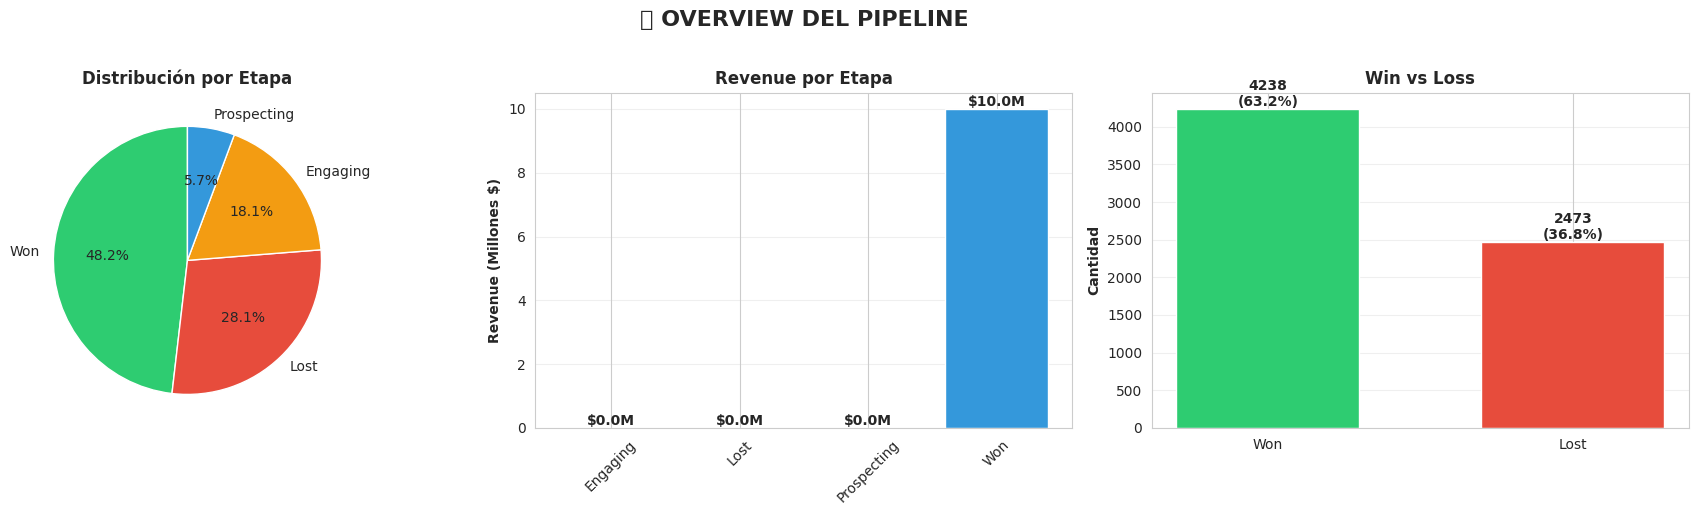

✅ Gráfica guardada: crm_pipeline_overview.png



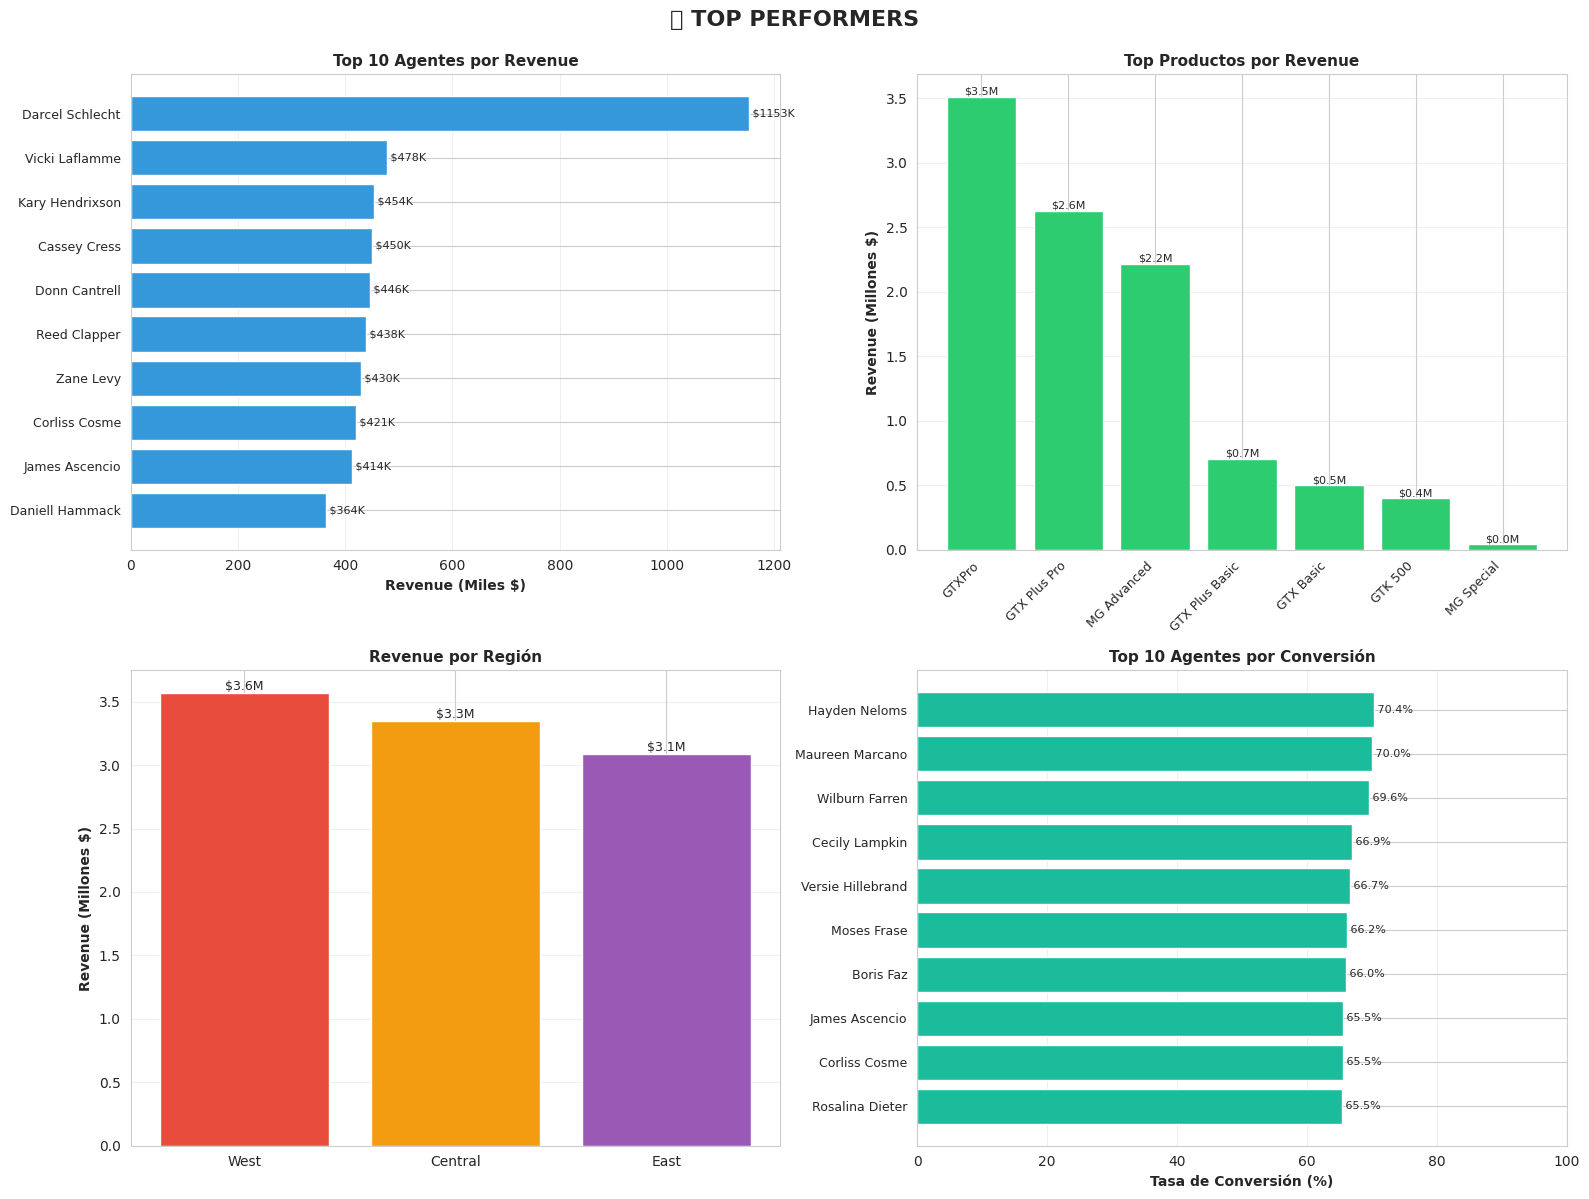

✅ Gráfica guardada: crm_top_performers.png



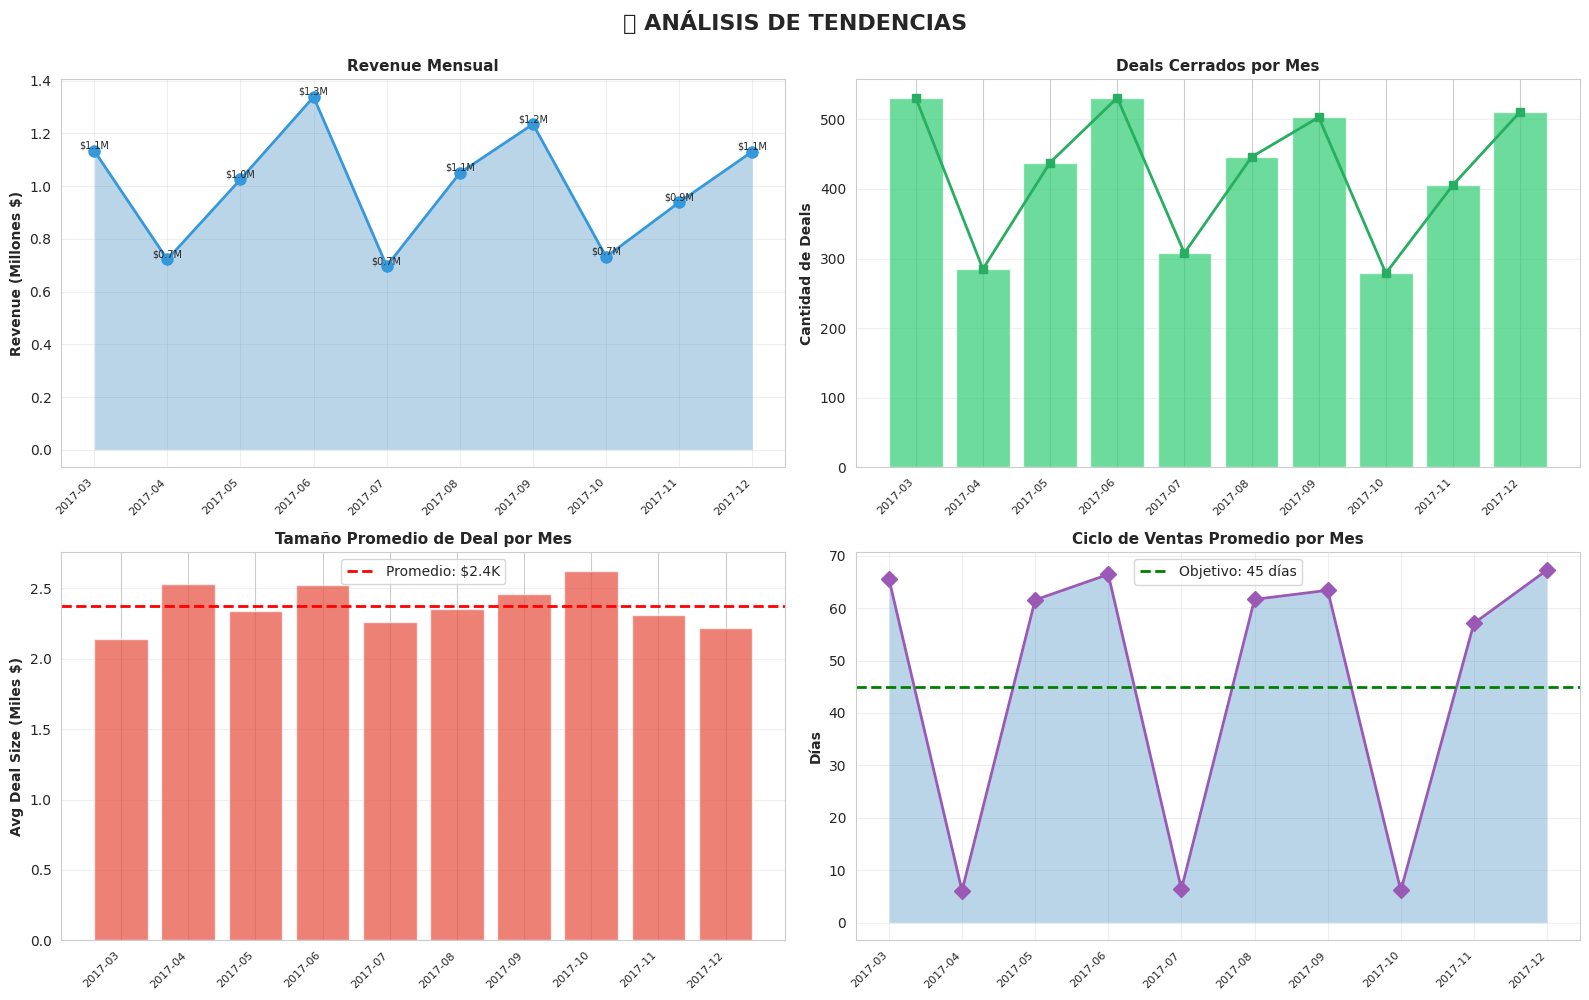

✅ Gráfica guardada: crm_trends_analysis.png



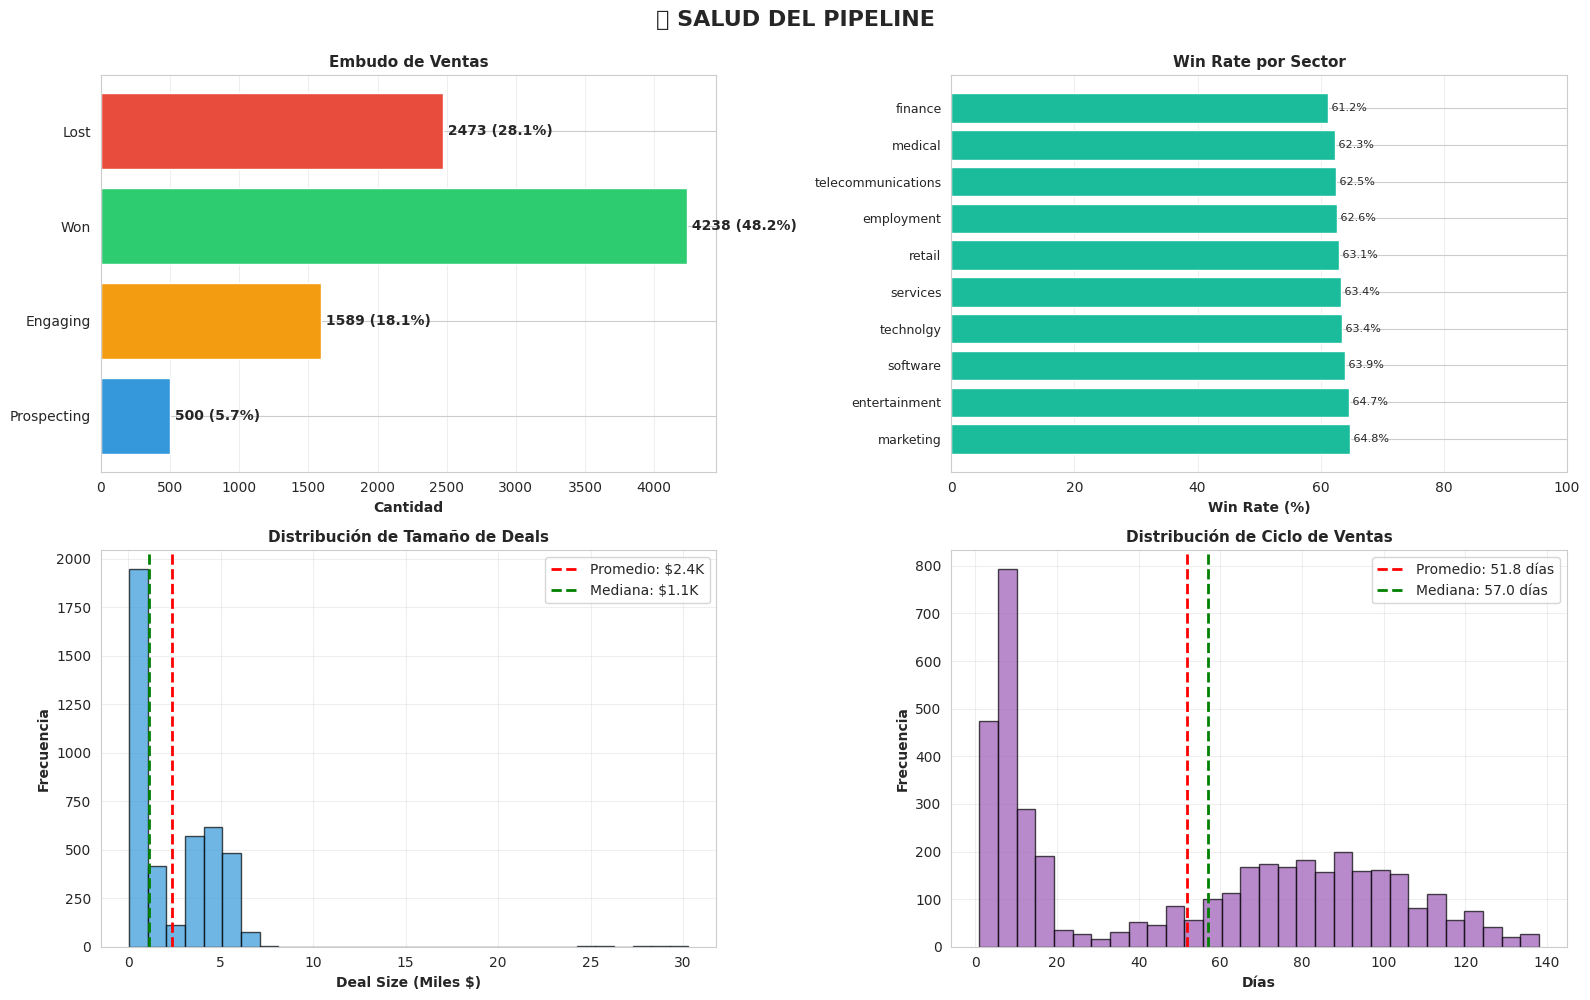

✅ Gráfica guardada: crm_pipeline_health.png

✅ TODAS LAS VISUALIZACIONES GENERADAS Y GUARDADAS

Archivos generados:
  📊 crm_pipeline_overview.png   - Overview general del pipeline
  🏆 crm_top_performers.png      - Top performers en todas las categorías
  📈 crm_trends_analysis.png     - Tendencias temporales y evolución
  💊 crm_pipeline_health.png     - Métricas de salud del pipeline
        

✨ REPORTE COMPLETO FINALIZADO


In [10]:
# ============================================================
# REPORTE DINÁMICO CON VISUALIZACIONES
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

class CRMAnalytics:
    """Clase para análisis dinámico de CRM con visualizaciones"""

    def __init__(self, sales_pipeline, accounts, sales_teams, products):
        self.timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        self.sales_pipeline = sales_pipeline
        self.accounts = accounts
        self.sales_teams = sales_teams
        self.products = products

        # Preparar datos
        self._prepare_data()

    def _prepare_data(self):
        """Preparar y limpiar datos"""
        # Limpiar nombres de columnas
        if len(self.sales_pipeline.columns) == 8:
            self.sales_pipeline.columns = ['opportunity_id', 'sales_agent', 'product',
                                           'account', 'deal_stage', 'engage_date',
                                           'close_date', 'close_value']

        # Convertir fechas
        self.sales_pipeline['engage_date'] = pd.to_datetime(self.sales_pipeline['engage_date'])
        self.sales_pipeline['close_date'] = pd.to_datetime(self.sales_pipeline['close_date'])

        # Crear DataFrame de productos si es necesario
        if isinstance(self.products, list):
            self.products = pd.DataFrame({
                'product': ['GTX Basic', 'GTXPro', 'MG Special', 'MG Advanced',
                           'GTX Plus Pro', 'GTX Plus Basic', 'GTK 500'],
                'series': ['GTX', 'GTX', 'MG', 'MG', 'GTX', 'GTX', 'GTK'],
                'sales_price': [550, 4821, 55, 3393, 5482, 1096, 26768]
            })

    def get_general_metrics(self):
        """Calcular métricas generales dinámicamente"""
        total_opps = len(self.sales_pipeline)
        won_deals = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won'])
        lost_deals = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Lost'])
        engaging = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Engaging'])
        prospecting = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Prospecting'])

        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won']
        total_revenue = won_data['close_value'].sum()
        avg_deal = won_data['close_value'].mean()

        # Calcular ciclo de ventas
        won_data_cycle = won_data.copy()
        won_data_cycle['cycle_days'] = (won_data_cycle['close_date'] -
                                         won_data_cycle['engage_date']).dt.days
        avg_cycle = won_data_cycle['cycle_days'].mean()

        # Tasa de conversión
        closed_deals = won_deals + lost_deals
        conversion_rate = (won_deals / closed_deals * 100) if closed_deals > 0 else 0

        return {
            'total_opportunities': total_opps,
            'won_deals': won_deals,
            'lost_deals': lost_deals,
            'engaging': engaging,
            'prospecting': prospecting,
            'total_revenue': total_revenue,
            'avg_deal_size': avg_deal,
            'avg_cycle_days': avg_cycle,
            'conversion_rate': conversion_rate,
            'won_percentage': (won_deals / total_opps * 100) if total_opps > 0 else 0
        }

    def plot_pipeline_overview(self):
        """Gráfica 1: Overview del Pipeline"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle('📊 OVERVIEW DEL PIPELINE', fontsize=16, fontweight='bold', y=1.02)

        # 1. Distribución de etapas (Pie Chart)
        stage_counts = self.sales_pipeline['deal_stage'].value_counts()
        colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']

        axes[0].pie(stage_counts.values, labels=stage_counts.index, autopct='%1.1f%%',
                    colors=colors, startangle=90)
        axes[0].set_title('Distribución por Etapa', fontsize=12, fontweight='bold')

        # 2. Revenue por etapa (Bar Chart)
        revenue_by_stage = self.sales_pipeline.groupby('deal_stage')['close_value'].sum() / 1000000
        axes[1].bar(range(len(revenue_by_stage)), revenue_by_stage.values,
                    color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db'])
        axes[1].set_xticks(range(len(revenue_by_stage)))
        axes[1].set_xticklabels(revenue_by_stage.index, rotation=45)
        axes[1].set_ylabel('Revenue (Millones $)', fontweight='bold')
        axes[1].set_title('Revenue por Etapa', fontsize=12, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)

        # Agregar valores en las barras
        for i, v in enumerate(revenue_by_stage.values):
            axes[1].text(i, v, f'${v:.1f}M', ha='center', va='bottom', fontweight='bold')

        # 3. Win/Loss Ratio
        won = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won'])
        lost = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Lost'])

        axes[2].bar(['Won', 'Lost'], [won, lost], color=['#2ecc71', '#e74c3c'], width=0.6)
        axes[2].set_ylabel('Cantidad', fontweight='bold')
        axes[2].set_title('Win vs Loss', fontsize=12, fontweight='bold')
        axes[2].grid(axis='y', alpha=0.3)

        # Agregar valores
        axes[2].text(0, won, f'{won}\n({won/(won+lost)*100:.1f}%)',
                     ha='center', va='bottom', fontweight='bold')
        axes[2].text(1, lost, f'{lost}\n({lost/(won+lost)*100:.1f}%)',
                     ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.savefig('crm_pipeline_overview.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Gráfica guardada: crm_pipeline_overview.png\n")

    def plot_top_performers(self):
        """Gráfica 2: Top Performers"""
        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won']

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🏆 TOP PERFORMERS', fontsize=16, fontweight='bold', y=0.995)

        # 1. Top 10 Agentes por Revenue
        agent_revenue = won_data.groupby('sales_agent')['close_value'].sum().sort_values(ascending=True).tail(10)
        axes[0, 0].barh(range(len(agent_revenue)), agent_revenue.values / 1000, color='#3498db')
        axes[0, 0].set_yticks(range(len(agent_revenue)))
        axes[0, 0].set_yticklabels(agent_revenue.index, fontsize=9)
        axes[0, 0].set_xlabel('Revenue (Miles $)', fontweight='bold')
        axes[0, 0].set_title('Top 10 Agentes por Revenue', fontsize=11, fontweight='bold')
        axes[0, 0].grid(axis='x', alpha=0.3)

        # Agregar valores
        for i, v in enumerate(agent_revenue.values):
            axes[0, 0].text(v/1000, i, f' ${v/1000:.0f}K', va='center', fontsize=8)

        # 2. Top 7 Productos por Revenue
        product_revenue = won_data.groupby('product')['close_value'].sum().sort_values(ascending=False).head(7)
        axes[0, 1].bar(range(len(product_revenue)), product_revenue.values / 1000000, color='#2ecc71')
        axes[0, 1].set_xticks(range(len(product_revenue)))
        axes[0, 1].set_xticklabels(product_revenue.index, rotation=45, ha='right', fontsize=9)
        axes[0, 1].set_ylabel('Revenue (Millones $)', fontweight='bold')
        axes[0, 1].set_title('Top Productos por Revenue', fontsize=11, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)

        # Agregar valores
        for i, v in enumerate(product_revenue.values):
            axes[0, 1].text(i, v/1000000, f'${v/1000000:.1f}M', ha='center', va='bottom', fontsize=8)

        # 3. Revenue por Región
        merged = won_data.merge(self.sales_teams, on='sales_agent', how='left')
        region_revenue = merged.groupby('regional_office')['close_value'].sum().sort_values(ascending=False)

        colors_region = ['#e74c3c', '#f39c12', '#9b59b6']
        axes[1, 0].bar(range(len(region_revenue)), region_revenue.values / 1000000,
                       color=colors_region[:len(region_revenue)])
        axes[1, 0].set_xticks(range(len(region_revenue)))
        axes[1, 0].set_xticklabels(region_revenue.index, fontsize=10)
        axes[1, 0].set_ylabel('Revenue (Millones $)', fontweight='bold')
        axes[1, 0].set_title('Revenue por Región', fontsize=11, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)

        # Agregar valores
        for i, v in enumerate(region_revenue.values):
            axes[1, 0].text(i, v/1000000, f'${v/1000000:.1f}M', ha='center', va='bottom', fontsize=9)

        # 4. Tasa de Conversión por Agente (Top 10)
        all_deals = self.sales_pipeline[self.sales_pipeline['deal_stage'].isin(['Won', 'Lost'])]
        conv_by_agent = all_deals.groupby('sales_agent').agg({
            'deal_stage': lambda x: (x == 'Won').sum() / len(x) * 100
        }).sort_values('deal_stage', ascending=True).tail(10)

        axes[1, 1].barh(range(len(conv_by_agent)), conv_by_agent['deal_stage'].values, color='#1abc9c')
        axes[1, 1].set_yticks(range(len(conv_by_agent)))
        axes[1, 1].set_yticklabels(conv_by_agent.index, fontsize=9)
        axes[1, 1].set_xlabel('Tasa de Conversión (%)', fontweight='bold')
        axes[1, 1].set_title('Top 10 Agentes por Conversión', fontsize=11, fontweight='bold')
        axes[1, 1].grid(axis='x', alpha=0.3)
        axes[1, 1].set_xlim(0, 100)

        # Agregar valores
        for i, v in enumerate(conv_by_agent['deal_stage'].values):
            axes[1, 1].text(v, i, f' {v:.1f}%', va='center', fontsize=8)

        plt.tight_layout()
        plt.savefig('crm_top_performers.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Gráfica guardada: crm_top_performers.png\n")

    def plot_trends_analysis(self):
        """Gráfica 3: Análisis de Tendencias"""
        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won'].copy()
        won_data['close_month'] = won_data['close_date'].dt.to_period('M')

        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('📈 ANÁLISIS DE TENDENCIAS', fontsize=16, fontweight='bold', y=0.995)

        # 1. Revenue Mensual
        monthly_revenue = won_data.groupby('close_month')['close_value'].sum() / 1000000
        months = [str(m) for m in monthly_revenue.index]

        axes[0, 0].plot(range(len(monthly_revenue)), monthly_revenue.values,
                        marker='o', linewidth=2, markersize=8, color='#3498db')
        axes[0, 0].fill_between(range(len(monthly_revenue)), monthly_revenue.values, alpha=0.3)
        axes[0, 0].set_xticks(range(len(monthly_revenue)))
        axes[0, 0].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[0, 0].set_ylabel('Revenue (Millones $)', fontweight='bold')
        axes[0, 0].set_title('Revenue Mensual', fontsize=11, fontweight='bold')
        axes[0, 0].grid(alpha=0.3)

        # Agregar valores
        for i, v in enumerate(monthly_revenue.values):
            axes[0, 0].text(i, v, f'${v:.1f}M', ha='center', va='bottom', fontsize=7)

        # 2. Deals Cerrados por Mes
        monthly_deals = won_data.groupby('close_month')['opportunity_id'].count()

        axes[0, 1].bar(range(len(monthly_deals)), monthly_deals.values, color='#2ecc71', alpha=0.7)
        axes[0, 1].plot(range(len(monthly_deals)), monthly_deals.values,
                        marker='s', linewidth=2, markersize=6, color='#27ae60')
        axes[0, 1].set_xticks(range(len(monthly_deals)))
        axes[0, 1].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[0, 1].set_ylabel('Cantidad de Deals', fontweight='bold')
        axes[0, 1].set_title('Deals Cerrados por Mes', fontsize=11, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)

        # 3. Avg Deal Size por Mes
        avg_deal_size = won_data.groupby('close_month')['close_value'].mean() / 1000

        axes[1, 0].bar(range(len(avg_deal_size)), avg_deal_size.values, color='#e74c3c', alpha=0.7)
        axes[1, 0].set_xticks(range(len(avg_deal_size)))
        axes[1, 0].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[1, 0].set_ylabel('Avg Deal Size (Miles $)', fontweight='bold')
        axes[1, 0].set_title('Tamaño Promedio de Deal por Mes', fontsize=11, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)

        # Línea de tendencia
        axes[1, 0].axhline(y=avg_deal_size.mean(), color='red', linestyle='--',
                           linewidth=2, label=f'Promedio: ${avg_deal_size.mean():.1f}K')
        axes[1, 0].legend()

        # 4. Ciclo de Ventas por Mes
        won_data['cycle_days'] = (won_data['close_date'] - won_data['engage_date']).dt.days
        cycle_by_month = won_data.groupby('close_month')['cycle_days'].mean()

        axes[1, 1].plot(range(len(cycle_by_month)), cycle_by_month.values,
                        marker='D', linewidth=2, markersize=8, color='#9b59b6')
        axes[1, 1].fill_between(range(len(cycle_by_month)), cycle_by_month.values, alpha=0.3)
        axes[1, 1].set_xticks(range(len(cycle_by_month)))
        axes[1, 1].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[1, 1].set_ylabel('Días', fontweight='bold')
        axes[1, 1].set_title('Ciclo de Ventas Promedio por Mes', fontsize=11, fontweight='bold')
        axes[1, 1].grid(alpha=0.3)

        # Línea objetivo
        axes[1, 1].axhline(y=45, color='green', linestyle='--', linewidth=2, label='Objetivo: 45 días')
        axes[1, 1].legend()

        plt.tight_layout()
        plt.savefig('crm_trends_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Gráfica guardada: crm_trends_analysis.png\n")

    def plot_pipeline_health(self):
        """Gráfica 4: Salud del Pipeline"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('💊 SALUD DEL PIPELINE', fontsize=16, fontweight='bold', y=0.995)

        # 1. Funnel de Ventas
        funnel_data = self.sales_pipeline['deal_stage'].value_counts()
        funnel_order = ['Prospecting', 'Engaging', 'Won', 'Lost']
        funnel_values = [funnel_data.get(stage, 0) for stage in funnel_order]
        colors_funnel = ['#3498db', '#f39c12', '#2ecc71', '#e74c3c']

        y_pos = np.arange(len(funnel_order))
        axes[0, 0].barh(y_pos, funnel_values, color=colors_funnel)
        axes[0, 0].set_yticks(y_pos)
        axes[0, 0].set_yticklabels(funnel_order)
        axes[0, 0].set_xlabel('Cantidad', fontweight='bold')
        axes[0, 0].set_title('Embudo de Ventas', fontsize=11, fontweight='bold')
        axes[0, 0].grid(axis='x', alpha=0.3)

        # Agregar valores y porcentajes
        total = sum(funnel_values)
        for i, v in enumerate(funnel_values):
            pct = (v / total * 100) if total > 0 else 0
            axes[0, 0].text(v, i, f' {v} ({pct:.1f}%)', va='center', fontweight='bold')

        # 2. Win Rate por Sector
        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won']
        all_closed = self.sales_pipeline[self.sales_pipeline['deal_stage'].isin(['Won', 'Lost'])]

        merged_closed = all_closed.merge(self.accounts[['account', 'sector']], on='account', how='left')
        sector_winrate = merged_closed.groupby('sector').agg({
            'deal_stage': lambda x: (x == 'Won').sum() / len(x) * 100
        }).sort_values('deal_stage', ascending=False).head(10)

        axes[0, 1].barh(range(len(sector_winrate)), sector_winrate['deal_stage'].values, color='#1abc9c')
        axes[0, 1].set_yticks(range(len(sector_winrate)))
        axes[0, 1].set_yticklabels(sector_winrate.index, fontsize=9)
        axes[0, 1].set_xlabel('Win Rate (%)', fontweight='bold')
        axes[0, 1].set_title('Win Rate por Sector', fontsize=11, fontweight='bold')
        axes[0, 1].grid(axis='x', alpha=0.3)
        axes[0, 1].set_xlim(0, 100)

        # Agregar valores
        for i, v in enumerate(sector_winrate['deal_stage'].values):
            axes[0, 1].text(v, i, f' {v:.1f}%', va='center', fontsize=8)

        # 3. Distribución de Deal Size
        deal_sizes = won_data['close_value'] / 1000

        axes[1, 0].hist(deal_sizes, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
        axes[1, 0].axvline(deal_sizes.mean(), color='red', linestyle='--',
                           linewidth=2, label=f'Promedio: ${deal_sizes.mean():.1f}K')
        axes[1, 0].axvline(deal_sizes.median(), color='green', linestyle='--',
                           linewidth=2, label=f'Mediana: ${deal_sizes.median():.1f}K')
        axes[1, 0].set_xlabel('Deal Size (Miles $)', fontweight='bold')
        axes[1, 0].set_ylabel('Frecuencia', fontweight='bold')
        axes[1, 0].set_title('Distribución de Tamaño de Deals', fontsize=11, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)

        # 4. Ciclo de Ventas Distribución
        won_data_cycle = won_data.copy()
        won_data_cycle['cycle_days'] = (won_data_cycle['close_date'] -
                                         won_data_cycle['engage_date']).dt.days
        cycle_days = won_data_cycle['cycle_days']

        axes[1, 1].hist(cycle_days, bins=30, color='#9b59b6', alpha=0.7, edgecolor='black')
        axes[1, 1].axvline(cycle_days.mean(), color='red', linestyle='--',
                           linewidth=2, label=f'Promedio: {cycle_days.mean():.1f} días')
        axes[1, 1].axvline(cycle_days.median(), color='green', linestyle='--',
                           linewidth=2, label=f'Mediana: {cycle_days.median():.1f} días')
        axes[1, 1].set_xlabel('Días', fontweight='bold')
        axes[1, 1].set_ylabel('Frecuencia', fontweight='bold')
        axes[1, 1].set_title('Distribución de Ciclo de Ventas', fontsize=11, fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)

        plt.tight_layout()
        plt.savefig('crm_pipeline_health.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Gráfica guardada: crm_pipeline_health.png\n")

    def generate_all_visualizations(self):
        """Generar todas las visualizaciones"""
        print("\n" + "="*70)
        print("🎨 GENERANDO VISUALIZACIONES...")
        print("="*70 + "\n")

        self.plot_pipeline_overview()
        self.plot_top_performers()
        self.plot_trends_analysis()
        self.plot_pipeline_health()

        print("="*70)
        print("✅ TODAS LAS VISUALIZACIONES GENERADAS Y GUARDADAS")
        print("="*70)
        print("""
Archivos generados:
  📊 crm_pipeline_overview.png   - Overview general del pipeline
  🏆 crm_top_performers.png      - Top performers en todas las categorías
  📈 crm_trends_analysis.png     - Tendencias temporales y evolución
  💊 crm_pipeline_health.png     - Métricas de salud del pipeline
        """)

    def generate_dynamic_report(self):
        """Generar reporte completo dinámico"""
        metrics = self.get_general_metrics()

        report = f"""
╔══════════════════════════════════════════════════════════════════════════╗
║                    REPORTE DINÁMICO DE CRM                               ║
║             Actualizado: {self.timestamp}                        ║
╚══════════════════════════════════════════════════════════════════════════╝

📊 MÉTRICAS GENERALES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Total Oportunidades:              {metrics['total_opportunities']:,}
├─ Won:                           {metrics['won_deals']:,} ({metrics['won_percentage']:.1f}%)
├─ Lost:                          {metrics['lost_deals']:,}
├─ Engaging:                      {metrics['engaging']:,}
└─ Prospecting:                   {metrics['prospecting']:,}

Revenue Total:                    ${metrics['total_revenue']:,.2f}
Avg Deal Size:                    ${metrics['avg_deal_size']:,.2f}
Ciclo Promedio:                   {metrics['avg_cycle_days']:.1f} días
Conversión:                       {metrics['conversion_rate']:.1f}%
"""
        return report

    def print_full_report(self):
        """Imprimir reporte completo con visualizaciones"""
        print(self.generate_dynamic_report())
        print("\n🎨 Generando visualizaciones...\n")
        self.generate_all_visualizations()

# ============================================================
# EJECUTAR REPORTE COMPLETO CON GRÁFICAS
# ============================================================

print("\n" + "="*70)
print("🔄 GENERANDO REPORTE DINÁMICO CON VISUALIZACIONES...")
print("="*70)

# Inicializar y generar reporte completo
crm = CRMAnalytics(sales_pipeline, accounts, sales_teams, products)
crm.print_full_report()

print("\n✨ REPORTE COMPLETO FINALIZADO")
